# TP2 - parcours dans les graphes (en présentiel)

Dans le cours, [chapitre 2](http://www.fil.univ-lille1.fr/~varre/portail/graphes/docs/chap02-parcours.pdf), vous avez découvert les parcours de graphes.

L'objectif de ce TP est de mettre en œuvre ces algorithmes de parcours et de comprendre ce que sont les arbres couvrant par la même occasion (qu'on a évoqué en cours, et qu'on peut retrouver section du chapitre 2).

Nous verrons une application au calcul des composantes connexes d'un graphe.

## Partie 1 - parcours en largeur et en profondeur

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
g = nx.Graph([(0,1),(0,2),(1,3),(2,4),(2,1),(3,5),(5,1)])

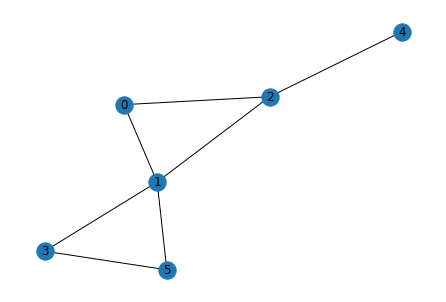

In [6]:
nx.draw(g,with_labels=True)

Implanter la fonction `parcours_en_largeur` qui étant donné un `graphe` (NetworkX) et un `sommet` de ce graphe, réalise un parcours en **largeur** et retourne la liste des sommets dans l'ordre dans lequel ils ont été visités.

In [7]:
def parcours_en_largeur(graphe, sommet):
    neighbors = []
    for j in nx.neighbors(graphe,sommet):
        neighbors.append(j)
    visiter = [sommet]
    for i in neighbors:
        if i not in visiter: 
            visiter.append(i)
            for k in nx.neighbors(graphe,i):
                neighbors.append(k)
    return visiter


Tester à partir de chaque sommet et vérifier que le parcours est correct.

In [8]:
parcours_en_largeur(g,0)

[0, 1, 2, 3, 5, 4]

Implanter la fonction `parcours_en_profondeur` qui étant donné un `graphe` (NetworkX) et un `sommet` de ce graphe, réalise un parcours en **profondeur** et retourne la liste des sommets dans l'ordre dans lequel ils ont été visités.

In [9]:
def parcours_en_profondeur(graphe, sommet):
    visiter = []
    neighbors = []
    for i in nx.neighbors(graphe,sommet) :
        neighbors.append(i)
    while neighbors != [] :
        pointeur = neighbors.pop(0)
        if pointeur not in visiter : 
            visiter.append(pointeur)
            for j in nx.neighbors(graphe, pointeur) :
                neighbors.append(j)
    return visiter

Tester à partir de chaque sommet et vérifier que le parcours est correct.

In [10]:
parcours_en_profondeur(g,0)

[1, 2, 0, 3, 5, 4]

## Partie 2 - amélioration du parcours

Relire le dernier paragraphe de la section 2.2.3 du chapitre 2.

Reprendre la fonction de parcours en profondeur et afficher l'état de la pile à chaque tour de boucle. Tester et constater que des sommets sont empilés plusieurs fois.

In [12]:
def parcours_en_profondeur2(graphe, sommet):
    visiter = []
    neighbors = []
    for i in nx.neighbors(graphe,sommet) :
        neighbors.append(i)
    while neighbors != [] :
        print(neighbors)
        pointeur = neighbors.pop(0)
        if pointeur not in visiter : 
            visiter.append(pointeur)
            for j in nx.neighbors(graphe, pointeur) :
                neighbors.append(j)
    return visiter

parcours_en_profondeur2(g,0)

[1, 2]
[2, 0, 3, 2, 5]
[0, 3, 2, 5, 0, 4, 1]
[3, 2, 5, 0, 4, 1, 1, 2]
[2, 5, 0, 4, 1, 1, 2, 1, 5]
[5, 0, 4, 1, 1, 2, 1, 5]
[0, 4, 1, 1, 2, 1, 5, 3, 1]
[4, 1, 1, 2, 1, 5, 3, 1]
[1, 1, 2, 1, 5, 3, 1, 2]
[1, 2, 1, 5, 3, 1, 2]
[2, 1, 5, 3, 1, 2]
[1, 5, 3, 1, 2]
[5, 3, 1, 2]
[3, 1, 2]
[1, 2]
[2]


[1, 2, 0, 3, 5, 4]

Reprendre l'algorithme de parcours en profondeur et le modifier pour s'assurer qu'un sommet n'est empilé qu'une et une seule fois dans la pile en cours de parcours.

In [40]:
def parcours_ameliore(graphe, sommet):
    visiter = []
    neighbors = []
    for i in nx.neighbors(graphe,sommet) :
        neighbors.append(i)
    while neighbors != [] :
        pointeur = neighbors.pop(0)
        if pointeur not in visiter : 
            visiter.append(pointeur)
            for j in nx.neighbors(graphe, pointeur) :
                if j not in neighbors :
                    neighbors.append(j)
    return visiter

Vérifier sur des exemples.

In [22]:
parcours_ameliore(g,0)

[1, 2]
[2, 0, 3, 5]
[0, 3, 5, 4, 1]
[3, 5, 4, 1, 2]
[5, 4, 1, 2]
[4, 1, 2, 3]
[1, 2, 3]
[2, 3]
[3]


[1, 2, 0, 3, 5, 4]

Est-ce que votre algorithme implémente toujours un parcours en profondeur ?

## Partie 3 - arbre de parcours

Vous pouvez vous référer à la section 2.3 'Arbres de parcours' du chapitre 2.

Comme lorsqu'on parcourt un graphe on construit implictement un arbre de parcours, on propose ici de créer une fonction qui calcule un nouveau graphe qui est un graphe de parcours du graphe initial. Pour construire cet arbre de parcours, il suffit à chaque fois qu'on emprunte une arête de l'ajouter dans le nouvel arbre.

Reprennez le code de l'algorithme de parcours en profondeur réalisé en partie 1 et modifiez le pour écrire la fonction `arbre_couvrant` qui cette fois retourne un arbre de parcours plutôt que la liste des sommets.

In [36]:
def arbre_couvrant (graphe, sommet):
    last = None
    g = nx.Graph()
    neighbors = []
    for i in nx.neighbors(graphe,sommet) :
        neighbors.append(i)
    while neighbors != [] :
        print(neighbors)
        pointeur = neighbors.pop(0)
        if last is not None :
            if pointeur not in list(g.nodes()) : 
                g.add_edge(last,pointeur)
                last = pointeur
                for j in nx.neighbors(graphe, pointeur) :
                    if j not in neighbors :
                        neighbors.append(j)
        else:
            last = pointeur
            for j in nx.neighbors(graphe, pointeur) :
                if j not in neighbors :
                    neighbors.append(j)

    return g

In [37]:
ac = arbre_couvrant(g,0)

[1, 2]
[2, 0, 3, 5]
[0, 3, 5, 4, 1]
[3, 5, 4, 1, 2]
[5, 4, 1, 2]
[4, 1, 2, 3]
[1, 2, 3]
[2, 3]
[3]


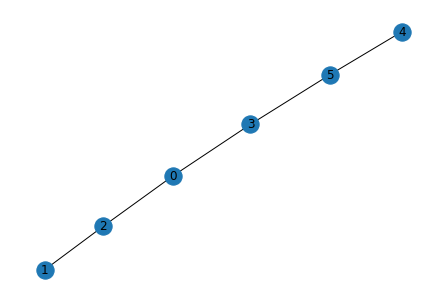

In [38]:
nx.draw(ac,with_labels=True)

## Partie 4 - application au calcul de composantes connexes

Comme indiqué en section 2.3, un arbre de parcours est appelé arbre couvrant si tous les sommets du graphe sont couverts par un arbre de parcours. L'existence d'un arbre couvrant implique que le graphe est connexe (et réciproquement) puisque qu'à partir de n'importe quel sommet il faut pouvoir accéder à tous les autres (il existe un chemin entre chaque paire de sommets du graphe).

Ecrire une fonction `est_connexe` qui teste si un graphe est connexe.

In [41]:
def est_connexe(graphe):
    couvrant = parcours_ameliore(graphe,0)
    sommets = list(graphe.nodes)
    while couvrant != [] :
        if couvrant.pop(0) not in sommets :
            return False
    return True
    
est_connexe(g)

True

Lire la section 2.4.1 du chapitre 2 qui définit ce qu'est une cmposante connexe.

Ecrire une fonction `composantes_connexes` qui calcule l'ensemble des composantes connexes d'un graphe.

In [42]:
def composantes_connexes(graphe):
    allSommets = list(graphe.nodes)
    visiter = []
    while allSommets != [] :
        vu = list(arbre_couvrant(graphe,allSommets[0]).nodes)
        visiter.append(vu)
        for elt in vu :
            allSommets.remove(elt)
    return visiter


In [46]:
nonConexe = nx.Graph([(0,1),(1,2),(5,6),(6,7)])
composantes_connexes(nonConexe)


[1]
[0, 2]
[2, 1]
[1]
[6]
[5, 7]
[7, 6]
[6]


[[1, 0, 2], [6, 5, 7]]